# DATA VISUALIZATION WORKSHOP
This workshop introduces foundational visualization techniques in Python using **pandas**, **matplotlib**, and **seaborn**.

We will explore the **Palmer Penguins** dataset — a real biological dataset commonly used for visualization practice.

### In this notebook, you will learn:
- How to load and explore a dataset
- How to choose the right type of plot
- How to create bar, line, scatter, histogram, and box plot visualizations
- Best practices for clean, meaningful graphics
- How to customize colors, labels, and styles

## Setup

To begin, we import the core libraries used in Python data visualization.  
- **pandas** lets us load and inspect datasets . 
- **matplotlib** for low-level plotting functions.
- **seaborn** for higher-level, aesthetically pleasing visualizations. 

These will form the foundation for every plot we create in this workshop.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [7]:
# Load the penguins dataset in seaborn
# df = df.read_csv("path_to_your_data.csv")  # if you have a local CSV file

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


A quick exploration helps guide which visualizations will be appropriate and highlights any missing values or irregularities.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.isna().sum() #missing values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
# Drop rows with missing values
df = df.dropna()

df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
# Convert body_mass_g to kg for a better interpretation
df["body_mass_kg"] = df["body_mass_g"] / 1000

# Encode categorical variable for regression example
df["species_code"] = df["species"].astype("category").cat.codes

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg,species_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65,0


## Visualization

### Choosing Plots for Data Types

| Data Type                 | Suggested Plots                              | Notes                                           |
| ------------------------- | -------------------------------------------- | ----------------------------------------------- |
| Numerical                 | Histogram, Density, Scatter                  | Use to see distribution, outliers, relationship |
| Categorical               | Bar plot, Countplot                          | Use for frequencies and comparison              |
| Numerical vs Numerical    | Scatterplot                                  | Check correlations/trends                       |
| Categorical vs Numerical  | Boxplot, Barplot                             | Compare distributions across groups             |
| Time Series               | Line plot, Area plot                         | Trend over time                                 |
| Multiple Continuous       | Heatmap (correlation matrix)                 | Detect relationships & multicollinearity        |


## Scenario 1 - Distribution of a Single Variable

*Use case:* I want to understand the distribution of a numeric variable.

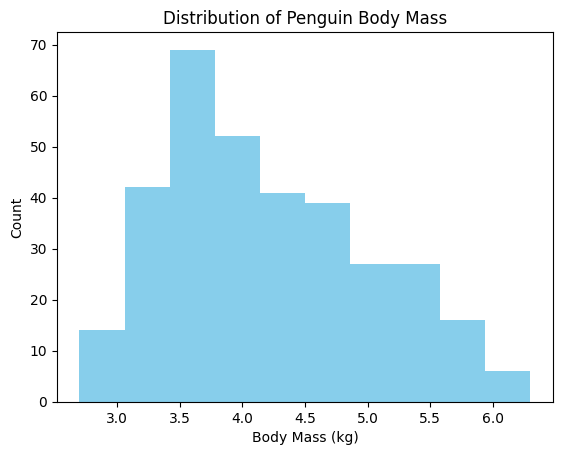

In [14]:
# Histograms
plt.hist(df["body_mass_kg"], bins = 10, color='skyblue')
plt.xlabel("Body Mass (kg)")
plt.ylabel("Count")
plt.title("Distribution of Penguin Body Mass")
plt.show()

**Note:**
A histogram provides insight into:
- skewness  
- typical ranges  
- potential outliers  
- overall spread of the data  

This is a good first step when examining any continuous variable.

## Scenario 2 - Relationship between Two Numeric Variables

*Use case:* Relationship, pattern or trend.

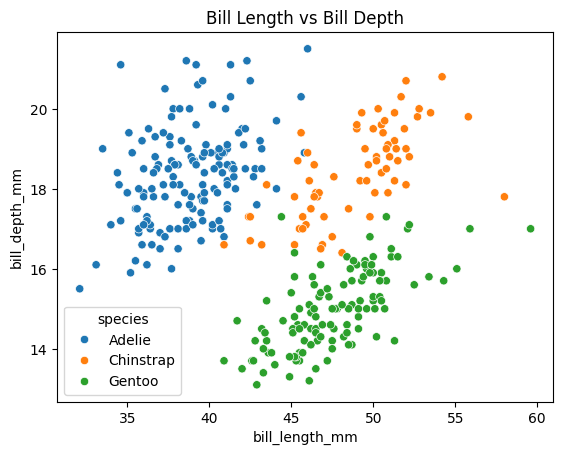

In [15]:
# Scatter Plot
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species"
)
plt.title("Bill Length vs Bill Depth")
plt.show()


**Note:**
A scatter plot allows us to:
- observe relationships or trends  
- detect clusters or group separation  
- compare species using color coding  

This is one of the most powerful visual tools for exploring relationships in your data.

## Scenario 3 - Compare Distributions Across Groups

*Use case:* Compare numeric distributions by category.

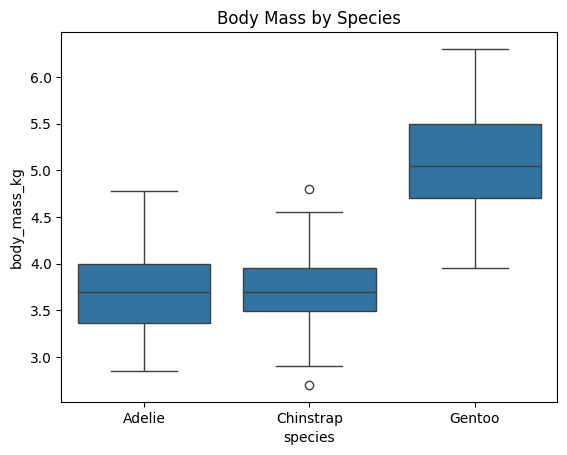

In [17]:
# Box Plot
sns.boxplot(
    data=df,
    x="species",
    y="body_mass_kg",
)
plt.title("Body Mass by Species")
plt.show()

**Note:**
A boxplot summarizes:
- median  
- spread  
- interquartile range  
- potential outliers  

This makes it easy to compare groups such as species or islands.

## Scenario 4 - Comparing Category Counts

*Use Case:* Understanding how frequently each category appears in the dataset.

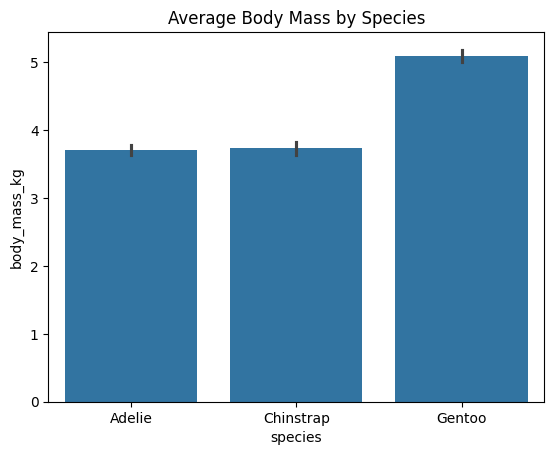

In [18]:
# Bar Plot (Categorical)
sns.barplot(data=df, x="species", y="body_mass_kg")
plt.title("Average Body Mass by Species")
plt.show()

**Note:** 
A bar plot is ideal when you want to:
- compare the size of different groups  
- identify which category is most or least common  
- get an overview of the distribution of categorical variables  

This is often the first visualization to create when exploring categorical features such as **species** or **island**.

## Scenario 5 - Understanding Relationships Across Multiple Numeric Variables

*Use case:* Getting an overview of how several numeric features relate to one another.

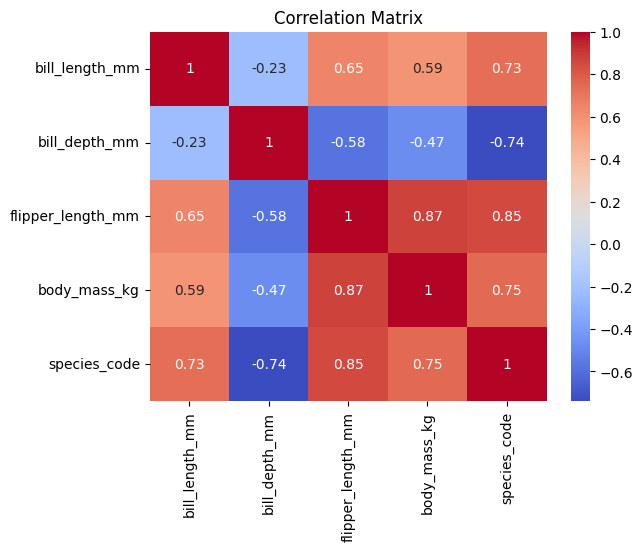

In [19]:
# Correlation Matrix
corr = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_kg","species_code"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Note:**
A correlation matrix provides a compact summary of:
- the strength of linear relationships  
- positive and negative associations  
- variables that move together or in opposite directions  

Visualizing it as a heatmap makes patterns easier to spot and helps guide which pairs of variables may be worth exploring further with scatter plots or additional analysis. (An indicator for multicollinearity!!)

## Scenario 6 - Assessing Linear Relationships Between Two Numeric Variables

*Use case:* Evaluating whether two numeric variables show a linear trend or directional pattern.

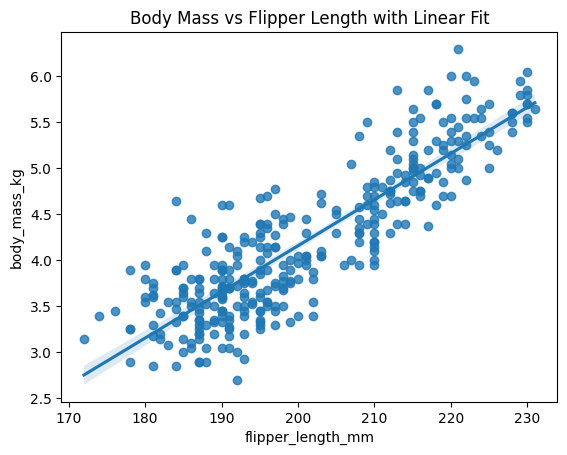

In [22]:
# Scatter Plot with Linear Fit
sns.regplot(data=df, x="flipper_length_mm", y="body_mass_kg")

# `ci=NONE` to disable confidence interval shading
# sns.regplot(data=df, x="flipper_length_mm", y="body_mass_kg", ci=None)

plt.title("Body Mass vs Flipper Length with Linear Fit")
plt.show()

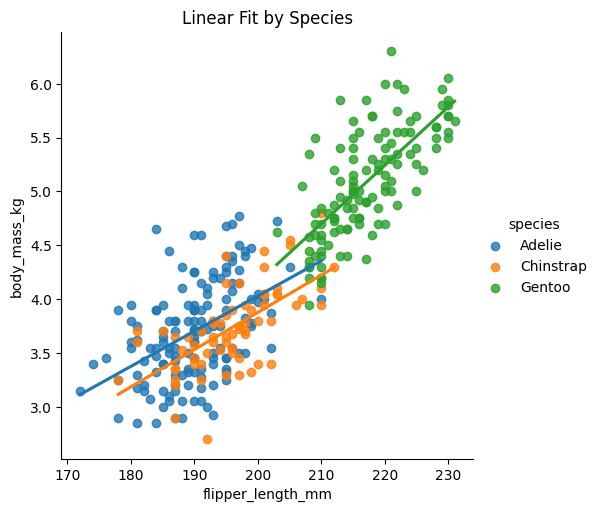

In [25]:
# Linear Fit by Species (Grouping by Category)
sns.lmplot(data=df, x="flipper_length_mm", y="body_mass_kg", hue="species", ci=None)
plt.title("Linear Fit by Species")
plt.show()

**Note:**
A scatter plot is the most effective way to:
- visualize potential linear relationships  
- identify positive or negative associations  
- detect clusters, group differences, or outliers  
- assess whether a line of best fit might be appropriate  

This plot is commonly used as a first step before applying correlation coefficients or regression models.

## Conclusion

### Best Practices for Visualization

When creating visualizations, a few consistent habits can make your charts clearer, more informative, and easier to interpret:

- **Keep plots simple.** Focus on the key message and avoid unnecessary elements that distract from the data.
- **Label everything clearly.** Add descriptive axis labels, titles, and legends so the reader understands the variables immediately.
- **Choose appropriate plot types.** Match the visualization to the data type (e.g., scatter for numeric–numeric, boxplot for numeric–categorical).
- **Use consistent color schemes.** Colors should enhance clarity, not overwhelm; reserve strong colors for emphasis.
- **Check for missing or extreme values.** Outliers or NaNs can affect the appearance of plots and should be handled intentionally.
- **Ensure readability.** Increase figure size when necessary, space out tick labels, and avoid crowding the plot area.
- **Consider your audience.** Provide enough context for someone unfamiliar with the dataset to understand your visual.
- **Use comparisons wisely.** When comparing groups, ensure scales and axes are aligned and consistent.
- **Tell a story.** Each plot should support a specific question or insight rather than exist in isolation.

These principles help produce visualizations that are both professional and effective.
